**This case study is to find valuable insights regarding customer to maximize the sales of 3 products of AEROFIT.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from scipy.special import comb
from scipy.stats import binom
from scipy.stats import norm

!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv -O 'aerofit.csv'

df = pd.read_csv('aerofit.csv')

## **Exploratory Data Analysis**

In [ ]:
df.shape #Analysis will be done for 180 Data points with 9 different Parameters to draw insights

df.info() # Dataset contains both continuous and categorical Parameters
          # Categorical - Product , Gender, MaritalStatus
          # Continuous - Age , Education, Usage, Fitness, Income, Miles

#Statistical Summary
df.describe()
df.describe(include = object)

df.isna().sum() #There is no missing value and we can proceed towards getting more insights
df["Product"].value_counts()
df["Gender"].value_counts()
df["MaritalStatus"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

 **STATISTICAL SUMMARY (for Categorical Parameters) :**
 - Most people **bought KP281 model** thats $1500.
 - **Male Gender** bought most products from Aerofit.
 -**Partnered People** bought most Aerofit Products.


 **STATISTICAL SUMMARY (for Continuous Parameters) :**
  - Mean Age for group is 28.7 and median is 26 (There is **possibility of outliers**). The Age group being analysed is between **18-50 years.**
  - Mean Education years is 15.57 and median is 16. (There might not be many outliers). Education of buyers is between 12-21 years.
  - Mean Number of times person wants to use is 3.4 times and median is 3 times. The Range of Usage is between **2-7 times per week**.
  - Self rating fitness mean is 3.3 while median is 3. People have rated themselves between 1-5.
  - Mean annual Income of people buying products is 53719.577 and median is 50596. Annual Income of people ranges between**16506 - 104581**.
  - Mean expection miles one expects to walk is 103 per week and median is 94 miles per week ( **there are chances of outliers**). People wants to walk anywhere between **21-360 miles per week**.



# VARIOUS MARGINAL PROBABILITIES ANALYSIS:
- Probability of Male buying a Treadmill
- Probability of Partnered buying Treadmill
- Probability of Selling of 3 Models of Treadmill

- Which Age group buys most fitness equipment
- What is the years of education of people buying Treadmills
- For Aerofit what is usual runnig frequency and miles/distance for treadmills expected by user
- Which self fitness Rated person buys most treadmills
- Which Income group buys the most treadmills

In [ ]:
pMale = len(df[df["Gender"]=='Male'])/len(df["Gender"]) #0.5777
pMaritalStatus = len(df[df["MaritalStatus"]=='Partnered'])/len(df["MaritalStatus"]) #0.5944
pKP281=len(df[df["Product"]=='KP281'])/len(df["Product"]) #0.44
pKP481=len(df[df["Product"]=='KP481'])/len(df["Product"]) #0.33
pKP781=len(df[df["Product"]=='KP781'])/len(df["Product"]) #0.22


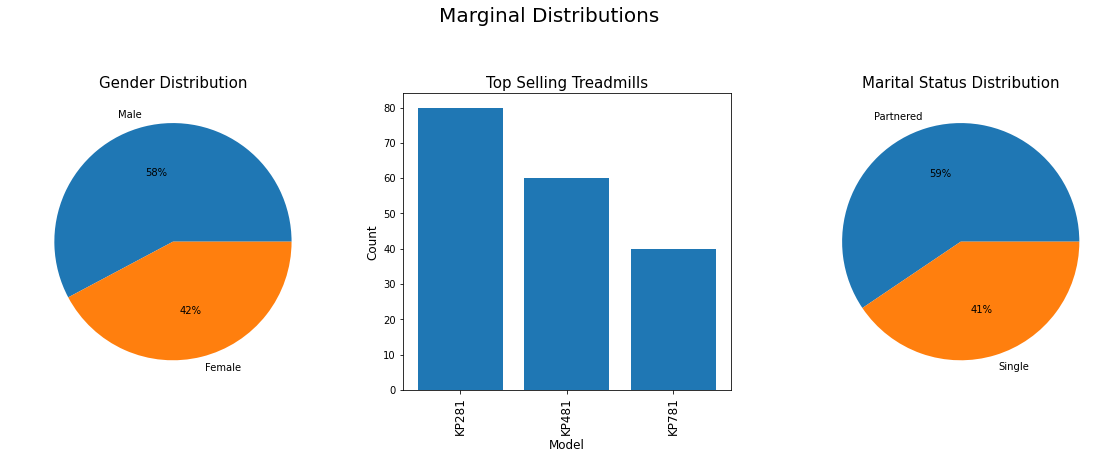

In [ ]:
gender=df['Gender'].value_counts()
maritial= df['MaritalStatus'].value_counts()
product = pd.DataFrame(df['Product'].value_counts()).reset_index()
product.rename(columns={'index': 'Product', 'Product': 'Count'}, inplace=True)



plt.figure(figsize=(20,12)).suptitle("Marginal Distributions",fontsize=20)

plt.subplot(2, 3, 1)
plt.title('Gender Distribution',fontsize=15)
gender.plot(kind='pie',label = " ",autopct='%.0f%%')


plt.subplot(2, 3, 3)
plt.title('Marital Status Distribution',fontsize=15)
maritial.plot(kind='pie',label = " ",autopct='%.0f%%')

plt.subplot(2, 3, 2)
plt.title('Top Selling Treadmills',fontsize=15)
y_bar = product['Product']
x_bar = product['Count']
plt.bar(y_bar,x_bar)
plt.xlabel('Model',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90, fontsize=12)

plt.show()

#Partnered People tend to buy treadmill

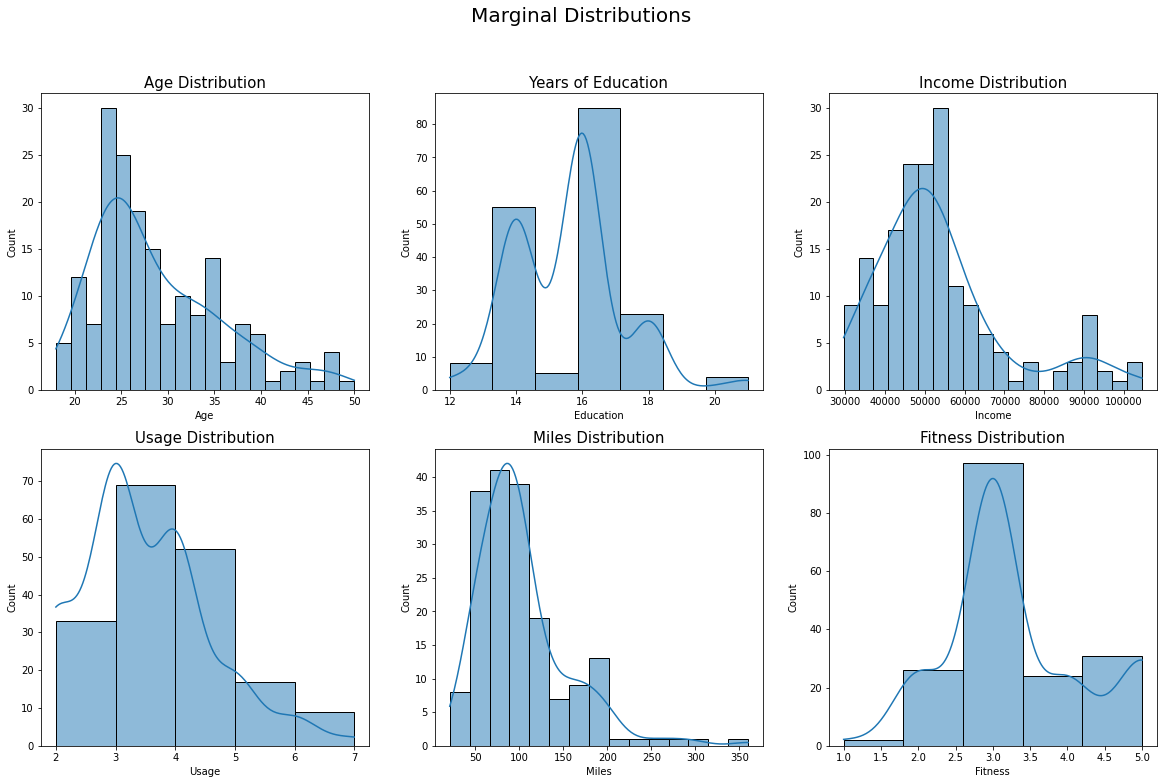

In [ ]:
plt.figure(figsize=(20,12)).suptitle("Marginal Distributions",fontsize=20)

plt.subplot(2, 3, 1)
plt.title('Age Distribution',fontsize=15)
sns.histplot(df["Age"],bins=20,kde=True)

plt.subplot(2, 3, 2)
plt.title('Years of Education',fontsize=15)
sns.histplot(df["Education"],bins=7,kde=True)

plt.subplot(2, 3, 3)
plt.title('Income Distribution',fontsize=15)
sns.histplot(df["Income"],bins=20,kde=True)

plt.subplot(2, 3, 4)
plt.title('Usage Distribution',fontsize=15)
sns.histplot(df["Usage"],bins=5,kde=True)


plt.subplot(2, 3, 5)
plt.title('Miles Distribution',fontsize=15)
sns.histplot(df["Miles"],bins=15,kde=True)

plt.subplot(2, 3, 6)
plt.title('Fitness Distribution',fontsize=15)
sns.histplot(df["Fitness"],bins=5,kde=True)

plt.show()

In [ ]:
len(df[(df["Age"]>21) & (df["Age"]<29) ])/len(df["Age"]) #0.5 - There is 50% chance that person aged between 21-29 buy Treadmill

len(df[(df["Education"]>15) & (df["Education"]<17) ])/len(df["Education"]) # 0.47 - There is 47% chance that person whose education is between 15-17 years buy Treadmill

len(df[(df["Income"]>42000) & (df["Income"]<57000) ])/len(df["Income"])# 0.50 There is 50% chance that person whose income is between $42000-57000 per year buy Treadmill

len(df[(df["Usage"]>2.5) & (df["Usage"]<5) ])/len(df["Usage"])#0.67 There is 67% chance that person whose usage is between 2-5 times per week buy Treadmill

len(df[(df["Miles"]>50) & (df["Miles"]<100) ])/len(df["Miles"])# 0.5 There is 50% chance that person whose intend to walk between 50-100 miles per week buy Treadmill

len(df[(df["Fitness"]>2) & (df["Fitness"]<5) ])/len(df["Fitness"])#0.67 There is 67% chance that person whose rated themselves between 2-5 buy Treadmill

0.6722222222222223

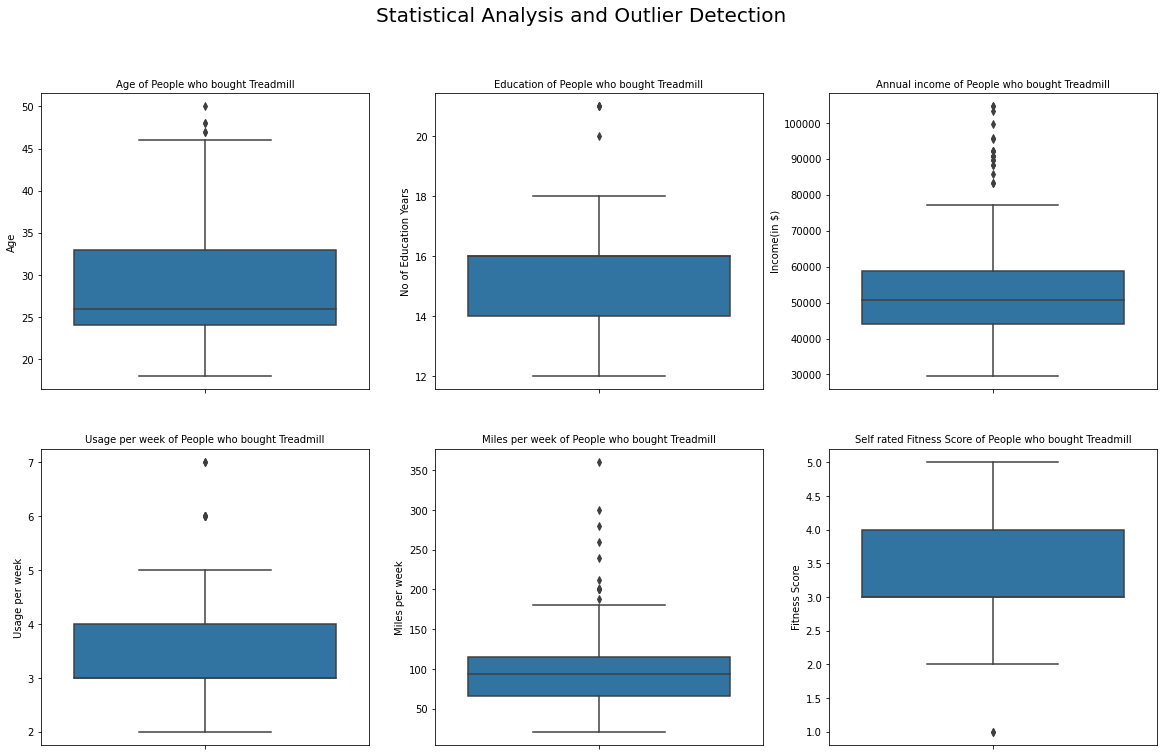

In [ ]:
plt.figure(figsize=(20,12)).suptitle("Statistical Analysis and Outlier Detection",fontsize=20)

plt.subplot(2, 3, 1)
sns.boxplot(y = df["Age"])
plt.yticks(fontsize=10)
plt.ylabel('Age', fontsize=10)
plt.title('Age of People who bought Treadmill', fontsize=10)

plt.subplot(2, 3, 2)
sns.boxplot(y = df["Education"])
plt.yticks(fontsize=10)
plt.ylabel('No of Education Years', fontsize=10)
plt.title('Education of People who bought Treadmill', fontsize=10)

plt.subplot(2, 3, 3)
sns.boxplot(y = df["Income"])
plt.yticks(fontsize=10)
plt.ylabel('Income(in $)', fontsize=10)
plt.title('Annual income of People who bought Treadmill', fontsize=10)

plt.subplot(2, 3, 4)
sns.boxplot(y = df["Usage"])
plt.yticks(fontsize=10)
plt.ylabel('Usage per week', fontsize=10)
plt.title('Usage per week of People who bought Treadmill', fontsize=10)

plt.subplot(2, 3, 5)
sns.boxplot(y = df["Miles"])
plt.yticks(fontsize=10)
plt.ylabel('Miles per week', fontsize=10)
plt.title('Miles per week of People who bought Treadmill', fontsize=10)

plt.subplot(2, 3, 6)
sns.boxplot(y = df["Fitness"])
plt.yticks(fontsize=10)
plt.ylabel('Fitness Score', fontsize=10)
plt.title('Self rated Fitness Score of People who bought Treadmill', fontsize=10)
plt.show()

# **Conditional Probability Analysis:**
- What is the probability of male and female buying 3 different models?
- what is the probability of married male and married female buying the treadmill ?
- which income category prefer which treadmill?
- Which fitness score prefer which treadmill?
- Does higher miles need and usage affect the product model?
- Does Number of education Years affect the model choice?

- Correlation between different attributes like
    - Miles and Fitness Score
    - age and Fitness
    - Educated and income
    - Usage and Fitness
    - Usage and Miles

In [ ]:
KP281_m = df[(df["Product"]=='KP281') & (df["Gender"]=='Male')]
KP481_m = df[(df["Product"]=='KP481') & (df["Gender"]=='Male')]
KP781_m = df[(df["Product"]=='KP781') & (df["Gender"]=='Male')]
KP281_f = df[(df["Product"]=='KP281') & (df["Gender"]=='Female')]
KP481_f = df[(df["Product"]=='KP481') & (df["Gender"]=='Female')]
KP781_f = df[(df["Product"]=='KP781') & (df["Gender"]=='Female')]

len(KP281_m)/len(df[df["Product"]=='KP281'])#0.50
len(KP481_m)/len(df[df["Product"]=='KP481'])#0.51
len(KP781_m)/len(df[df["Product"]=='KP781'])#0.82
#There is 82% chance if he's male he'll buy KP781 model

len(KP281_f)/len(df[df["Product"]=='KP281'])#0.50
len(KP481_f)/len(df[df["Product"]=='KP481'])#0.48
len(KP781_f)/len(df[df["Product"]=='KP781'])#0.175
#On contrary there is only 17% chance of female buying KP781
#There is almost 50-50 Chance that both male and female buy either of those 2 models


0.175

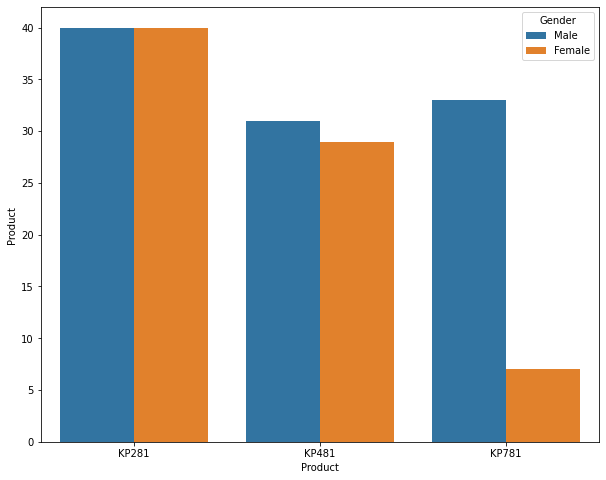

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Product',hue='Gender',data=df)
plt.ylabel('Product')
plt.show()

In [ ]:
married_male = df[(df["MaritalStatus"]=='Partnered') & (df["Gender"]=='Male')]
unmarried_male = df[(df["MaritalStatus"]=='Single') & (df["Gender"]=='Male')]

len(married_male)/len(df[df["MaritalStatus"]=='Partnered'])#0.57
len(unmarried_male)/len(df[df["MaritalStatus"]=='Single'])#0.58

married_female = df[(df["MaritalStatus"]=='Partnered') & (df["Gender"]=='Female')]
unmarried_female = df[(df["MaritalStatus"]=='Single') & (df["Gender"]=='Female')]

len(married_female)/len(df[df["MaritalStatus"]=='Partnered'])#0.42
len(unmarried_female)/len(df[df["MaritalStatus"]=='Single'])#0.41

# Married Men are more likely to by treadmill than married women.


0.410958904109589

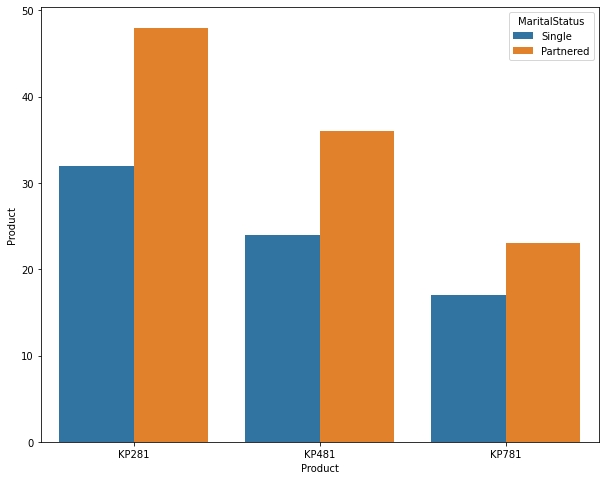

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Product',hue='MaritalStatus',data=df)
plt.ylabel('Product')
plt.show()

#Partnered people are more likely to buy KP281

In [ ]:
incomemean=df.groupby('Product')['Income'].mean().reset_index()
incomemin=df.groupby('Product')['Income'].min().reset_index()
incomemax=df.groupby('Product')['Income'].max().reset_index()

#If mean income is $75000 per annum or person earns more than $48000 per annum he prefers KP781
#If mean income is $49000 per annum or person earns between $32000-$67000 per annum he prefers KP481
#If mean income is $46500 per annum or person earns between $29000-$68000 per annum he prefers KP281

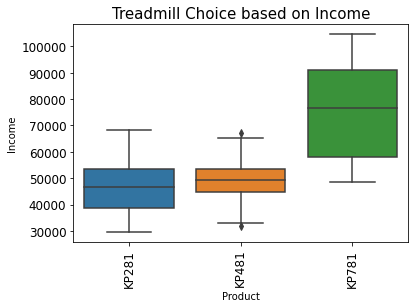

In [ ]:
sns.boxplot(x='Product', y='Income', data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Treadmill Choice based on Income', fontsize=15)
plt.show()

In [ ]:
fitnessmean=df.groupby('Product')['Fitness'].mean().reset_index()
fitnessmin=df.groupby('Product')['Fitness'].min().reset_index()
fitnessmax=df.groupby('Product')['Fitness'].max().reset_index()

#People who rate themselves higher in fitness score generally tend to buy KP781

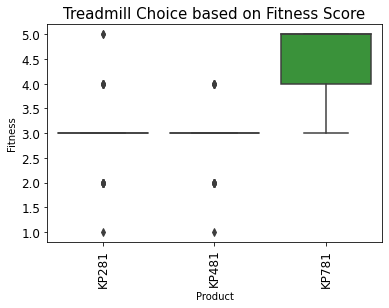

In [ ]:
sns.boxplot(x='Product', y='Fitness', data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Treadmill Choice based on Fitness Score', fontsize=15)
plt.show()

In [ ]:
usagemean=df.groupby('Product')['Usage'].mean().reset_index()
milesmean=df.groupby('Product')['Miles'].mean().reset_index()

usagemin=df.groupby('Product')['Usage'].min().reset_index()
milesmin=df.groupby('Product')['Miles'].min().reset_index()

usagemax=df.groupby('Product')['Usage'].max().reset_index()
milesmax=df.groupby('Product')['Miles'].max().reset_index()



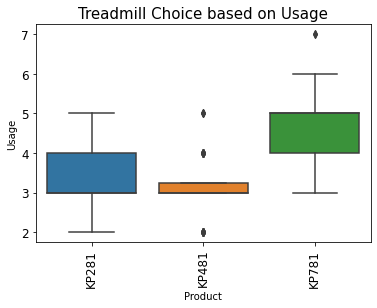

In [ ]:
sns.boxplot(x='Product', y='Usage', data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Treadmill Choice based on Usage', fontsize=15)
plt.show()

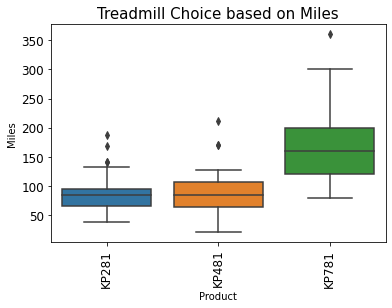

In [ ]:
sns.boxplot(x='Product', y='Miles', data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Treadmill Choice based on Miles', fontsize=15)
plt.show()

In [ ]:
yearmean=df.groupby('Product')['Education'].mean().reset_index()
yearmin=df.groupby('Product')['Education'].min().reset_index()
yearmax=df.groupby('Product')['Education'].max().reset_index()

#higher education years might make people by KP781 (14-21 yrs)

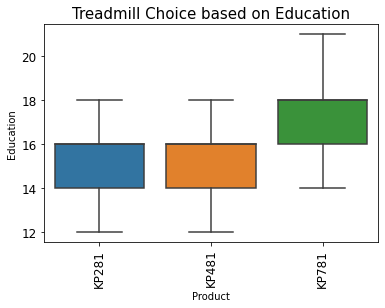

In [ ]:
sns.boxplot(x='Product', y='Education', data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Treadmill Choice based on Education', fontsize=15)
plt.show()

In [ ]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


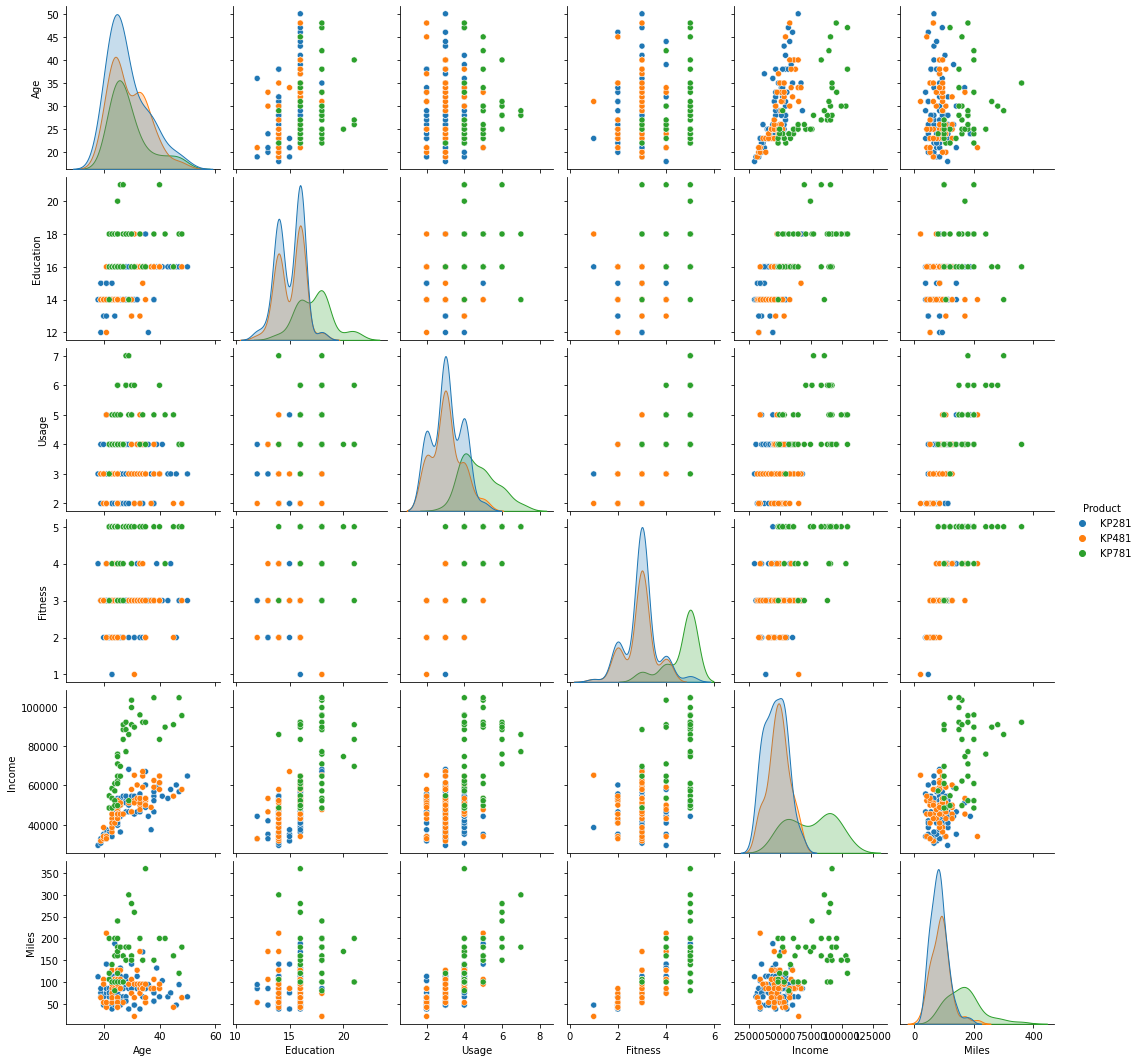

In [ ]:
sns.pairplot(data=df, hue='Product')
plt.show()

**Observations From Correlation:**
- Higher fitness score from all the corelation prefers KP781
- Higher usage expectaion tends to make KP781 sales.
- Fitness Score around mean and median prefers KP481
- Higher income people mostly tends to buy KP781 irrespective of fitness, miles,usage.
- Mostly men have rated themselves higher in fitness score
- Female are majorly choosing less usage per week


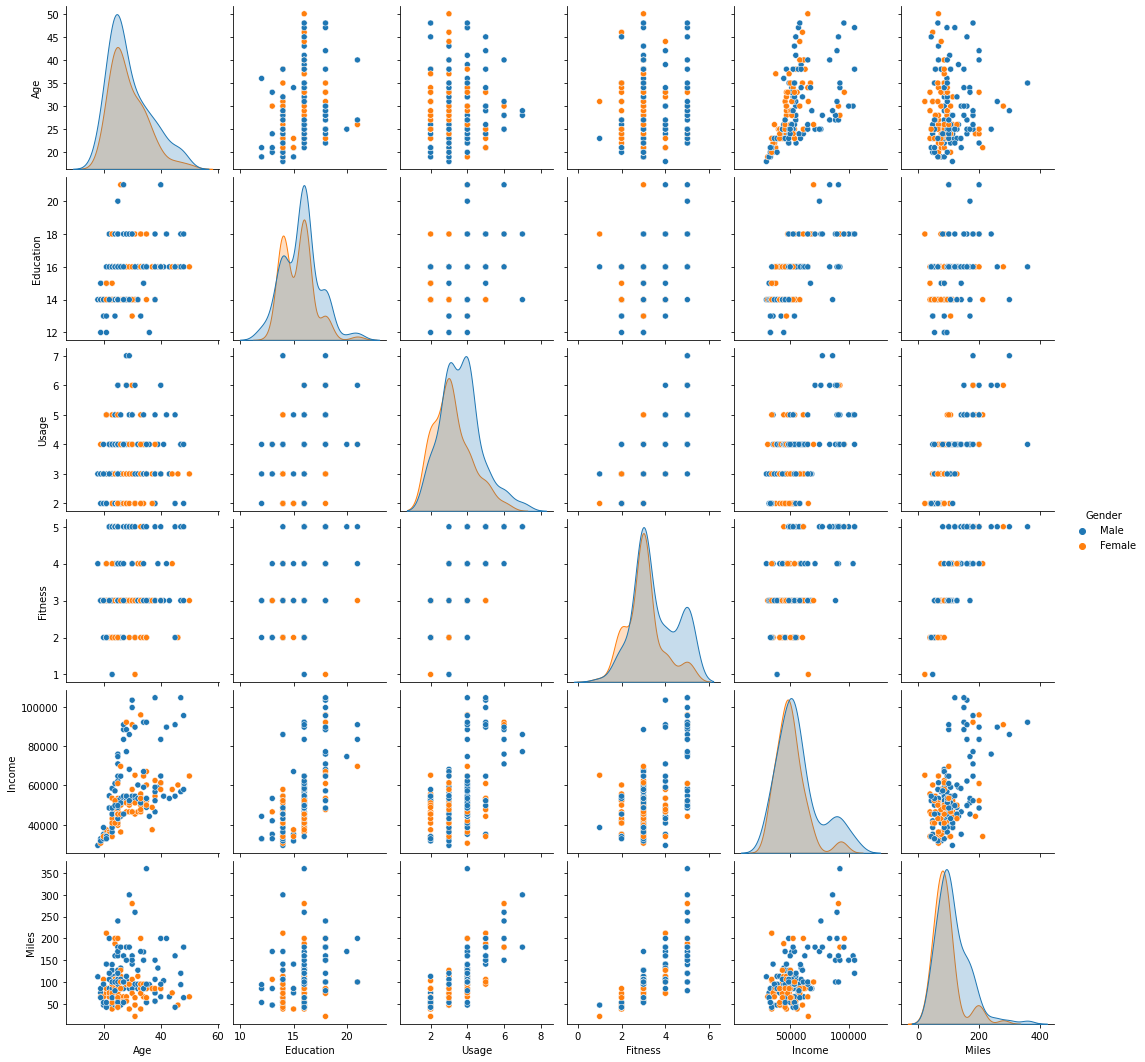

In [ ]:
sns.pairplot(data=df, hue='Gender')
plt.show()

# **Insights:**

- Buying people are between **age group 18-50 years** where people in **early 20s and late 20s are major buyers**.
- Major buyers are **Partnered people** almpst 60%
- There is almost**60% chances of men buying treadmill.**
- There is **82% chances** that if he's male he'll buy KP781
- **Female buying KP781** is only 17%
- **Married men** are more likely to buy trealmills
- Income plays major role in selection,**mean income of 75000** almost always prefer KP781 **irrespective of usage, miles, fitness score**.
 KP481 is prefered by mean income group of 49000
 KP281 is prefered by mean income group of 46500 (people earning almost 30000)
 -People who **rate themselves higher** prefers KP781
- KP781 is prefered for**higher usage** i.e. frequency(4+ times per week) and higher miles(150+ miles per week)
- KP781 is bought by generally people with **16+ years of education.**
-**Men tend to rate themselves higher on fitness scale**
-Female are choosing **less Usage per week**

# **Recommendations:**
- There is **scope for sale of treadmills in 30-50 years age group** as Gaussian Distribution for Age is skewed towards right.

- Aerofit can run **customised sale for single people** to boost up sales and **combo offers** for couples as partnered people are likely to buy.
- Female tend to**rate themselves lower** and men tend to rate themselves higher on fitness scale and from data it's evident that people who rate themselves higher tends to buy KP781. **Company can run campaign to sensitize female** about health benefits so that in long term they rate themselves higher.
-Aerofit should always **first suggest KP781** to **high income** people or who rate themselves higher on fitness scale or whose miles per week need is higer.
-**Lower income and medium miles** requirement peson should first be suggested **KP481**.
-**Low to medium income and partnered people** should first be suggested **KP281**.